# Estimating $f$-DP Curve for the Laplacian Mechanism using the PTLR Estimator

## Description

This notebook demonstrates how to use the PTLR estimator API to estimate the entire $f$-DP curve for the Laplacian Mechanism.

### Step 1: Import Packages

In [1]:
import numpy as np
import os
import sys
import matplotlib.pyplot as plt

# Navigate to the parent directory of the project structure
project_dir = os.path.abspath(os.path.join(os.getcwd(), '../..'))
src_dir = os.path.join(project_dir, 'src')
fig_dir = os.path.join(project_dir, 'fig')
os.makedirs(fig_dir, exist_ok=True)

# Add the src directory to sys.path
sys.path.append(src_dir)

from analysis.tradeoff_Laplace import Laplace_curve

from mech.LapDist import *

### Step 2: Instantiate the $f$-DP estimator for Laplacian Mechanism

In [2]:
kwargs = generate_params(num_samples = 100000, h=0.1)
estimator = LapPTLREstimator(kwargs)

### Step 3: Do the Estimation

In [3]:
output = estimator.build(eta_max = 15)

In [4]:
# Extract alpha and beta for plotting
alpha = output["alpha"]
beta = output["beta"]

### Step 4: Plot the $f$-curve

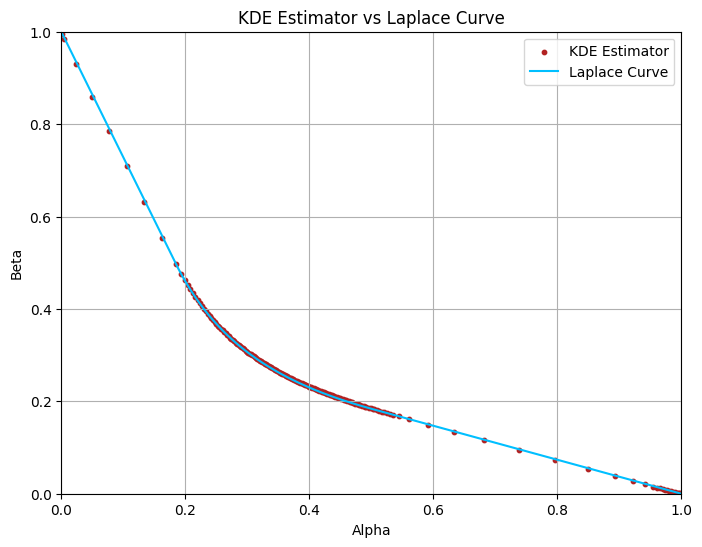

In [5]:
file_name = os.path.join(fig_dir, 'tradeoff_Laplacian_105_ptlr.png')
# Vectorize the function for plotting
Laplace_curve_vec = np.vectorize(Laplace_curve)

# Plot the results
plt.figure(figsize=(8, 6))

# Scatter plot for KDE Estimator results
plt.scatter(alpha, beta, color="firebrick", s=10, label="KDE Estimator")

# Plot the Laplace curve
alpha_values = np.linspace(0, 1, 1000)
plt.plot(alpha_values, Laplace_curve_vec(alpha_values), color="deepskyblue", linewidth=1.5, label="Laplace Curve")

# Plot aesthetics
plt.ylim(0, 1)
plt.xlim(0, 1)
plt.xlabel("Alpha")
plt.ylabel("Beta")
plt.title("KDE Estimator vs Laplace Curve")
plt.legend()
plt.grid()

# Save the plot
plt.savefig(file_name, bbox_inches = 'tight', dpi = 300);
plt.show()